# Финальное задание

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

## Задача: предсказание победы по данным о первых 5 минутах игры

По первым 5 минутам игры предсказать, какая из команд победит: Radiant или Dire?

## Набор данных

Набор данных с матчами записан в файле `matches.jsonlines.bz2`.
В каталоге `dictionaries` приведены расшифровки идентификаторов, которые присутствуют в записях матчей.

#### Чтение информации о матчах

Информация о матчах записана в сжатом текстовом файле `matches.jsonlines.bz2`, каждая строчка которого содержит объект в формате [JSON](https://ru.wikipedia.org/wiki/JSON). Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля `json`. Пример чтения матчей:

In [5]:
import json
import bz2

with bz2.BZ2File('./matches.jsonlines.bz2') as matches_file:
    for line in matches_file:
        match = json.loads(line)
        
        # Обработка матча
        break

#### Описание полей в записи матча

```python
{
    "match_id": 247,            # идентификатор матча
    "start_time": 1430514316,   # дата/время начала матча, unixtime
    "lobby_type": 0,            # тип комнаты, в которой собираются игроки 
                                #   (расшифровка в dictionaries/lobbies.csv)
 
    # стадия выбора героев
    "picks_bans": [
        {
            "order": 0,       # порядковый номер действия
            "is_pick": false, # true если команда выбирает героя, false — если банит
            "team": 1,        # команда, совершающая действие (0 — Radiant, 1 — Dire)
            "hero_id": 95     # герой, связанный с действием 
                              #    (расшифровка в dictionaries/heroes.csv)
        }, 
        ...
    ],

    # информация про каждого игрока, список ровно из 10 элементов
    # игроки с индексами от 0 до 4 — из команды Radiant, от 5 до 9 — Dire
    "players": [ 
        { 
        
            # герой игрока (расшифровка в dictionaries/heroes.csv)
            "hero_id": 67,  

            # временные ряды (отсчеты указаны в поле "times")
            "xp_t": [0, 13, 115, 177, 335, ...],   # опыт
            "gold_t": [0, 99, 243, 343, 499, ...], # золото + стоимость всех купленных вещей (net worth)
            "lh_t": [0, 0, 2, 2, 2, ...],          # количество убитых юнитов (не героев) противника

            # список событий: улучшение способностей героя
            "ability_upgrades": [
                {
                    "time": 51,      # игровое время
                    "level": 1,      # уровень игрока, на котором произошло улучшение
                    "ability": 5334  # способность, которая была улучшена 
                                     # (расшифровка в dictionaries/abilities.csv)
                }, 
                ...
            ],

            # список событий: убийства
            "kills_log": [
                {
                    "time": 831,    # игровое время
                    "player": 7,    # индекс игрока, чей герой был убит 
                                    #   (не заполнено, если был убит не герой)
                    "unit": "npc_dota_hero_viper" # тип убитого юнита
                }, 
                ...
            ],

            # список событий: покупка предметов
            "purchase_log": [
                {
                    "time": -73,     # игровое время
                                     #   точка отсчета игрового времени (ноль) начинается через
                                     #   несколько минут после фактического начала матча, поэтому
                                     #   время некоторых событий может быть отрицательным
                    "item_id": 44    # купленный предмер (расшифровка в dictionaries/items.csv)
                }, 
                ...
            ]

            # список событий: выкуп героя из таверны
            "buyback_log": [
                {"time": 2507},
                ...
            ],

            # список событий: установка героем "наблюдателей", позволяющих команде 
            # следить за чатью игрового поля на некотором расстоянии от точки установки
            "obs_log": [
                {
                    "time": 1711,    # игровое время установки
                    "xy": [111, 130] # координаты игрового поля
                }, 
                ...
            ],
            "sen_log": [], # аналогично полю obs_log, другой тип "наблюдателя"

        },
        ...
    ],
    
    # отсчеты игрового времени, в которые вычисляются значения временных рядов
    "times": [0, 60, 120, 180, ...],

    # ключевые события игры
    "objectives": [
        {
            "time": 198,           # время события
            "type": "firstblood",  # тип события
            "player1": 6,          # параметры события, могут содержать
            "player2": 1           #   индексы игроков (player), 
                                   #   номер команды (team, 0 — Radiant, 1 — Dire)
        }, 
        {
            "time": 765, 
            "type": "tower_kill", 
            "player": 7, 
            "team": 1
        }, 
        ...
    ]
    
    # итог матча (отсутствует в тестовых матчах)
    "finish": {
        "duration": 2980,             # длительность в секундах
        "radiant_win": false,         # true, если победила команда Radiant
        "tower_status_radiant": 0,    # состояние башен у команд к концу игры
        "tower_status_dire": 1972,    #   (см. описание битовой маски)
        "barracks_status_dire": 63,   # состояние бараков у команд к концу игры
        "barracks_status_radiant": 0  #   (см. описание битовой маски)
    }
}
```

#### Описание полей состояния башен и бараков

Состояние башен к концу игры задается целым числом, закодировано в битах:

```
┌─┬─┬─┬─┬─────────────────────── Not used.
│ │ │ │ │ ┌───────────────────── Ancient Bottom
│ │ │ │ │ │ ┌─────────────────── Ancient Top
│ │ │ │ │ │ │ ┌───────────────── Bottom Tier 3
│ │ │ │ │ │ │ │ ┌─────────────── Bottom Tier 2
│ │ │ │ │ │ │ │ │ ┌───────────── Bottom Tier 1
│ │ │ │ │ │ │ │ │ │ ┌─────────── Middle Tier 3
│ │ │ │ │ │ │ │ │ │ │ ┌───────── Middle Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ ┌─────── Middle Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ ┌───── Top Tier 3
│ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─── Top Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─ Top Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

Состояние бараков к концу игры закодировано в битах целого числа:

```
┌─┬───────────── Not used.
│ │ ┌─────────── Bottom Ranged
│ │ │ ┌───────── Bottom Melee
│ │ │ │ ┌─────── Middle Ranged
│ │ │ │ │ ┌───── Middle Melee
│ │ │ │ │ │ ┌─── Top Ranged
│ │ │ │ │ │ │ ┌─ Top Melee
│ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0
```

## Извлечение признаков

Скрипт extract_features.py производит извлечение признаков из известной информации о матче за первые 5 игровых минут, составляет из них таблицу. Таблица поможет вам быстрее сформировать матрицу объект-признак, вектор ответов и начать применять методы машинного обучения для решения поставленной задачи.

Признаки, представленные в таблице `features.csv`, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся. Более того, признаки в файле `features.csv` содержат не всю информацию, известную про матч за первые 5 игровых минут. Вы можете использовать скрипт `extract_features.py` как пример и добавлять свои признаки для улучшения качества предсказания.

#### Пример чтения файла с признаками

In [3]:
import pandas
features = pandas.read_csv('./features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16,2449,0,4,1974,3,63


#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

## Метрика качества

В качестве метрики качества мы будем использовать площадь под ROC-кривой (AUC-ROC). Обратите внимание, что AUC-ROC — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Оба алгоритма, которые будут использоваться в проекте — градиентный бустинг, и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict_proba. Она возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:
```python
pred = clf.predict_proba(X_test)[:, 1]
```

## Руководство по решению

Вам необходимо провести описанные ниже два этапа исследования, написать по результатам каждого этапа небольшой отчет (ниже указаны вопросы, ответы на которые должны содержаться в отчете), и предоставить для ревью данный отчет и код, с помощью которого вы выполнили задание.

**Обратите внимание:** высокое качество работы на кросс-валидации (близкое к 100%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Возможно, вы заглядываете в будущее или настраиваетесь на неправильном наборе признаков.

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import time
import datetime
from pandas import set_option
from pandas import value_counts
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from pandas import DataFrame

### Подход 1: градиентный бустинг "в лоб"
Один из самых универсальных алгоритмов, изученных в нашем курсе, является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать именно его в первую очередь.

1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.
3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.
3. Какой столбец содержит целевую переменную? Запишите его название.
4. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
2. Как называется столбец, содержащий целевую переменную?
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?


##### Рекомендации и советы

- Если все работает очень медлено:
   - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
   - Попробуйте упростить модель — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).
   
##### Измерение времени работы кода
```python
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # вместо этой строчки разместить замеряемый код

print 'Time elapsed:', datetime.datetime.now() - start_time
```

In [3]:
train = pd.read_csv("data/features.csv", index_col="match_id")
train

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,4,3,0,-24.0,2032,0,1792,1975,48,63
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,3,2,0,-17.0,1734,1,2038,6,63,3
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,1,3,1,-15.0,2906,0,1796,1846,51,63


In [4]:
finish_col = [
    "duration",
    "tower_status_radiant",
    "tower_status_dire",
    "barracks_status_radiant",
    "barracks_status_dire"
]
train.drop(finish_col, axis=1, inplace=True)

# 1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?

In [5]:
(len(train) -  train.count())[len(train) -  train.count() > 0]

first_blood_time               19553
first_blood_team               19553
first_blood_player1            19553
first_blood_player2            43987
radiant_bottle_time            15691
radiant_courier_time             692
radiant_flying_courier_time    27479
radiant_first_ward_time         1836
dire_bottle_time               16143
dire_courier_time                676
dire_flying_courier_time       26098
dire_first_ward_time            1826
dtype: int64

### Обоснование пропусков:
1. first_blood_time (игровое время первой крови) - в 20% случаев первой крови нет в первые 5 минут игры.

2. first_blood_player2 (второй игрок, причастный к событию) - первое убийство может быть совершено одним игроком.

In [6]:
train.fillna(0, inplace=True)

# 2. Как называется столбец, содержащий целевую переменную?

In [7]:
X_train = train.drop("radiant_win", axis=1)
y_train = train["radiant_win"]

In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.


In [9]:
def gradient_boost (X: pd.DataFrame, y: pd.Series) -> pd.Series:
    scores = {}
    
    for n in [10, 20, 30, 50, 80, 100, 120]:
        print('количество деревьев: ', n)
        model = GradientBoostingClassifier(n_estimators=n, random_state=42)

        start_time = datetime.datetime.now()
        score = cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
        print('Score: ', np.round(score, 3))
        print('Time elapsed:', datetime.datetime.now() - start_time)
        scores[n] = score
        print()
        
    return pd.Series(scores)

количество деревьев:  10
Score:  0.665
Time elapsed: 0:00:16.203719 3

количество деревьев:  20
Score:  0.682
Time elapsed: 0:00:37.816184 3

количество деревьев:  30
Score:  0.69
Time elapsed: 0:00:58.981867 3

количество деревьев:  50
Score:  0.697
Time elapsed: 0:01:17.718544 3

количество деревьев:  80
Score:  0.704
Time elapsed: 0:02:04.135743 3

количество деревьев:  100
Score:  0.706
Time elapsed: 0:03:01.855203 3



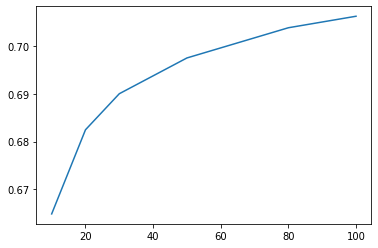

In [22]:
scores = gradient_boost(X_train, y_train)
scores.plot()

При 30 деревьях обучение проводилось 59 секунд, качество составило 0.69

# Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

При увеличении количества деревьев AUC-ROC увеличивается. Для ускорения обучения можно использовать часть выборки.

### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

**Важно:** не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?
3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).
4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.
5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
3. Сколько различных идентификаторов героев существует в данной игре?
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?


##### Код для формирования "мешка слов" по героям
```python
# N — количество различных героев в выборке
X_pick = np.zeros((data.shape[0], N))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
```

In [10]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?


In [11]:
def logistic_regression(X: pd.DataFrame, y: pd.Series) -> pd.Series:
    scores = {}

    for i in range(-5, 6):
        C = 10.0 ** i

        print('C = ', C)
        model = LogisticRegression(C=C, random_state=42)

        start_time = datetime.datetime.now()
        score = cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
        print('score', np.round(score, 3))
        print('Time elapsed:', datetime.datetime.now() - start_time)

        scores[i] = score
        print()

    return pd.Series(scores)

C =  1e-05
score 0.695
Time elapsed: 0:00:03.632240

C =  0.0001
score 0.711
Time elapsed: 0:00:02.665777

C =  0.001
score 0.716
Time elapsed: 0:00:02.847091

C =  0.01
score 0.717
Time elapsed: 0:00:03.960973

C =  0.1
score 0.717
Time elapsed: 0:00:03.595284

C =  1.0
score 0.717
Time elapsed: 0:00:03.776850

C =  10.0
score 0.717
Time elapsed: 0:00:04.466987

C =  100.0
score 0.717
Time elapsed: 0:00:04.367620

C =  1000.0
score 0.717
Time elapsed: 0:00:05.645240

C =  10000.0
score 0.717
Time elapsed: 0:00:05.047081

C =  100000.0
score 0.717
Time elapsed: 0:00:05.057079



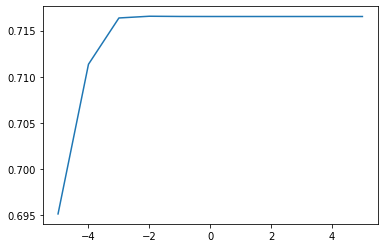

In [51]:
lr = logistic_regression(X_train, y_train)
lr.plot()

In [12]:
def max_roc_auc(scores):
    print('roc_auc = ', max(scores), '; C = ',10.0 ** scores.index[np.argmax(scores)])

In [66]:
max_roc_auc(lr)

roc_auc =  0.7165498862352037 ; C =  0.01


Логистическая регрессия работает заметно быстрее. Это объясняется тем, что зависимость между признаками и целевой переменной нелинейна.

# Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

In [13]:
cat_columns = ["lobby_type"] + [f"{i}{j}_hero" for i in ['r', 'd'] for j in range (1, 6)]
X_train.drop(cat_columns, axis=1, inplace=True)

C =  1e-05
score 0.695
Time elapsed: 0:00:01.026999

C =  0.0001
score 0.711
Time elapsed: 0:00:01.369287

C =  0.001
score 0.716
Time elapsed: 0:00:02.222391

C =  0.01
score 0.717
Time elapsed: 0:00:02.974269

C =  0.1
score 0.717
Time elapsed: 0:00:02.840950

C =  1.0
score 0.717
Time elapsed: 0:00:02.866765

C =  10.0
score 0.717
Time elapsed: 0:00:02.711827

C =  100.0
score 0.717
Time elapsed: 0:00:02.823354

C =  1000.0
score 0.717
Time elapsed: 0:00:02.816216

C =  10000.0
score 0.717
Time elapsed: 0:00:03.074465

C =  100000.0
score 0.717
Time elapsed: 0:00:02.769283



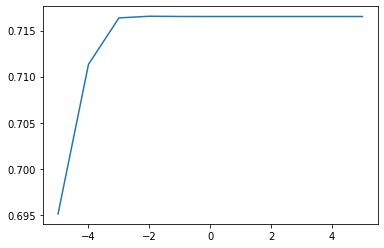

In [84]:
lr = logistic_regression(X_train, y_train)
lr.plot()

In [85]:
max_roc_auc(lr)

roc_auc =  0.7165592000076536 ; C =  0.01


Удаление категориальных признаков почти не повлияло на результат. Вывод: в предыдущем процессе модель смогла отсеять эти признаки.

# Сколько различных идентификаторов героев существует в данной игре?


In [43]:
heros = [f"{i}{j}_hero" for i in ['r', 'd'] for j in range (1, 6)]
N = max(train[heros].max())
print('The number of unique characters is', len(value_counts(train[heros].values.flatten())))

The number of unique characters is 108


In [22]:
pd.set_option('display.max_columns', None)

In [23]:
train

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_win
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,0.0,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,1
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,0.0,173.0,-80.0,0.0,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,0.0,63.0,-82.0,0.0,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,0
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,0.0,0.0,0.0,0.0,208.0,-75.0,0.0,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,0
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,0.0,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,7,2,616,535,0,0,2,10,1,3,879,1798,22,1,1,9,21,4,1835,1350,11,1,1,9,71,3,604,567,1,0,1,5,26,3,887,1023,0,1,0,7,19,5,2192,1674,13,2,0,7,93,5,1637,1339,18,0,1,9,3,3,972,847,1,1,1,11,28,3,1583,1634,10,2,0,6,114.0,0.0,2.0,8.0,245.0,-86.0,211.0,5,2,1,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0,0
114403,1450277704,0,43,4,1793,1416,17,0,1,5,26,3,764,800,0,1,0,9,4,3,1130,1585,20,1,1,14,29,4,1546,1166,8,1,0,6,110,3,892,541,1,0,1,4,72,3,966,1303,17,0,1,6,75,5,1745,1002,4,1,0,6,5,2,308,581,1,0,1,6,20,4,1260,1008,4,1,1,12,98,5,1791,1186,3,1,0,8,174.0,1.0,9.0,4.0,139.0,-85.0,202.0,5,3,2,0,-5.0,0.0,-82.0,0.0,4,3,2,0,-17.0,1
114404,1450291848,1,98,4,1399,540,1,0,0,5,11,4,1448,1371,17,0,1,13,112,3,658,646,2,0,0,10

# Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?


In [50]:
X_pick = np.zeros((train.shape[0], N))
for i, match_id in enumerate(train.index):
    for p in range(1, 5):
        X_pick[i, train.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, train.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
X_pick = pd.DataFrame(X_pick, index=train.index, columns=[f"hero_{i}" for i in range(N)])

In [51]:
X_train = pd.concat([X_train, X_pick], axis=1)

C =  1e-05
score 0.698
Time elapsed: 0:00:08.028626

C =  0.0001
score 0.72
Time elapsed: 0:00:05.779687

C =  0.001
score 0.738
Time elapsed: 0:00:07.363867

C =  0.01
score 0.743
Time elapsed: 0:00:11.208456

C =  0.1
score 0.743
Time elapsed: 0:00:13.817832

C =  1.0
score 0.743
Time elapsed: 0:00:14.263662

C =  10.0
score 0.743
Time elapsed: 0:00:12.609576

C =  100.0
score 0.743
Time elapsed: 0:00:14.182238

C =  1000.0
score 0.743
Time elapsed: 0:00:13.304820

C =  10000.0
score 0.743
Time elapsed: 0:00:13.447760

C =  100000.0
score 0.743
Time elapsed: 0:00:13.186024



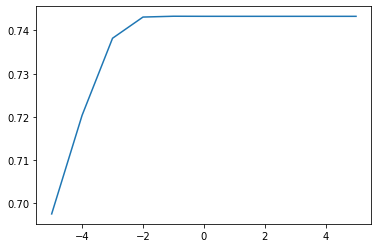

In [52]:
scores = logistic_regression(X_train, y_train)
scores.plot()

In [53]:
max_roc_auc(scores)

roc_auc =  0.7432914677097425 ; C =  0.1


Качество улучшилось благодаря улучшению входных данных.

# Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

In [54]:
model = LogisticRegression(C=0.1, random_state=42)
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
test = pd.read_csv("data/features_test.csv", index_col="match_id")
test.fillna(0, inplace=True)

In [57]:
X_test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)
X_test.drop(cat_columns, axis=1, inplace=True)
X_pick = np.zeros((test.shape[0], N))
for i, match_id in enumerate(test.index):
    for p in range(1, 5):
        X_pick[i, test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
X_pick = pd.DataFrame(X_pick, index=test.index, columns=[f"hero_{i}" for i in range(N)])
X_test = pd.concat([X_test, X_pick], axis=1)
X_test.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,hero_0,hero_1,hero_2,hero_3,hero_4,hero_5,hero_6,hero_7,hero_8,hero_9,hero_10,hero_11,hero_12,hero_13,hero_14,hero_15,hero_16,hero_17,hero_18,hero_19,hero_20,hero_21,hero_22,hero_23,hero_24,hero_25,hero_26,hero_27,hero_28,hero_29,hero_30,hero_31,hero_32,hero_33,hero_34,hero_35,hero_36,hero_37,hero_38,hero_39,hero_40,hero_41,hero_42,hero_43,hero_44,hero_45,hero_46,hero_47,hero_48,hero_49,hero_50,hero_51,hero_52,hero_53,hero_54,hero_55,hero_56,hero_57,hero_58,hero_59,hero_60,hero_61,hero_62,hero_63,hero_64,hero_65,hero_66,hero_67,hero_68,hero_69,hero_70,hero_71,hero_72,hero_73,hero_74,hero_75,hero_76,hero_77,hero_78,hero_79,hero_80,hero_81,hero_82,hero_83,hero_84,hero_85,hero_86,hero_87,hero_88,hero_89,hero_90,hero_91,hero_92,hero_93,hero_94,hero_95,hero_96,hero_97,hero_98,hero_99,hero_100,hero_101,hero_102,hero_103,hero_104,hero_105,hero_106,hero_107,hero_108,hero_109,hero_110,hero_111
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,-2.528200,0.501314,-0.230161,-0.126909,-0.357459,-0.537757,1.017574,0.291758,-0.332256,-0.011207,-0.316298,-0.164037,-0.533149,2.621540,0.297642,1.50723,1.993380,2.074565,1.080012,2.558429,-0.578154,-0.931725,-0.282744,-0.439414,-0.168958,0.450562,-0.525343,-0.579877,-0.937075,-0.277630,0.335277,-0.328926,-0.781746,-0.524078,-0.573665,0.292704,-0.417344,-0.208467,-0.440022,-0.694327,0.925434,-0.564562,0.689141,0.561134,1.174239,1.682043,1.635527,0.976313,-0.569909,0.695638,-0.347705,-0.640192,-0.196158,-0.942193,0.984245,-0.571065,0.285329,-0.311205,-0.147910,-0.380701,-0.454818,-0.53886,1.092615,-0.131690,1.515536,0.901467,-0.092379,0.219125,-0.540155,1.085005,-0.543829,-0.921682,-0.845521,-0.526742,-0.788219,-0.469871,-0.146503,-1.525446,-0.514555,-1.136970,0.700345,-0.987486,0.478886,1.901284,-0.383372,1.152733,0.018054,0.562864,-0.551154,-0.970428,3.093932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-2.527214,-1.297676,-1.195592,-1.245180,-1.131661,-0.537757,-0.578083,0.291758,0.578881,0.008600,0.607286,1.173453,-0.533149,-0.582396,-0.524101,0.59158,0.344425,-0.078385,0.297961,-0.529081,1.039791,-0.112095,-1.198079,-0.698973,-0.766270,-1.119305,1.030097,-0.579877,-0.113291,1.547460,1.980794,1.555606,1.565051,-0.524078,-0.573665,-0.941451,-0.417344,-0.588452,-0.394282,0.526938,-0.548801,-0.564562,-1.333437,0.561134,0.622630,-0.398950,-0.051792,-0.540261,-0.569909,-0.539528,0.570599,0.529226,0.634929,0.967601,-0.538253,-0.571065,2.339299,-0

In [61]:
prob = pd.Series(model.predict_proba(X_test)[:, 1])
prob

0        0.780990
1        0.702803
2        0.215636
3        0.870570
4        0.330253
           ...   
17172    0.662295
17173    0.728756
17174    0.238750
17175    0.546723
17176    0.479493
Length: 17177, dtype: float64

In [66]:
print('min = ', min(prob), ', max = ', max(prob))

min =  0.007889365700137685 , max =  0.9951907756985454


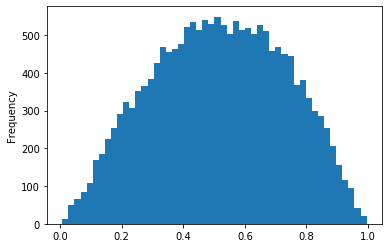

In [63]:
prob.plot.hist(bins=50)